<a href="https://colab.research.google.com/github/vichShir/TrabalhoFSI/blob/master/FSI_4%C2%BA_Trabalhov2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise Banco de Dados - Breast Cancer Wisconsin (Diagnostic)

In [0]:
#https://github.com/vichShir/TrabalhoFSI/tree/master
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

breast_diagnostic = pd.read_csv("drive/My Drive/Colab Datasets/data.csv")
breast_diagnostic.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


##Informações

In [0]:
breast_diagnostic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

###Coluna Diagnóstico

In [0]:
breast_diagnostic.diagnosis.describe()

count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

In [0]:
B = round(breast_diagnostic.diagnosis.value_counts().B/breast_diagnostic.diagnosis.count() * 100, 2)
M = round(breast_diagnostic.diagnosis.value_counts().M/breast_diagnostic.diagnosis.count() * 100, 2)
perc_diagnosis = pd.Series(
    [B, M, B+M], index=['B%', 'M%', 'Total']
)
perc_diagnosis

B%        62.74
M%        37.26
Total    100.00
dtype: float64

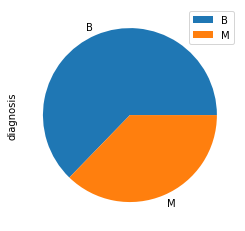

In [0]:
breast_diagnostic.diagnosis.value_counts().plot.pie()
plt.legend(loc='best')

### Colunas de Raios

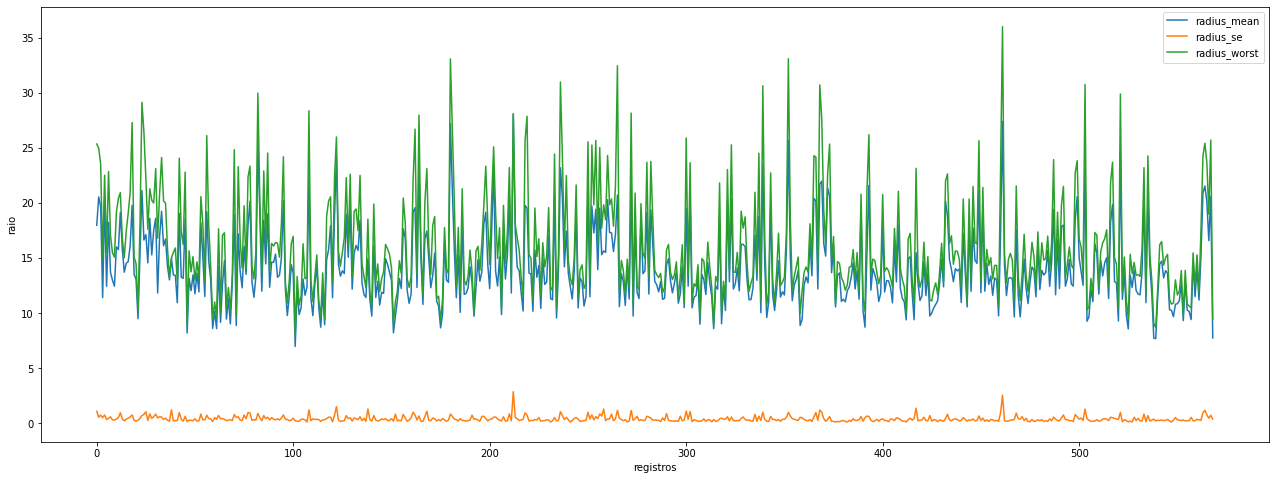

In [0]:
plt.rcParams['figure.figsize'] = (22, 8)

breast_diagnostic.radius_mean.plot.line()
breast_diagnostic.radius_se.plot.line()
breast_diagnostic.radius_worst.plot.line()

plt.xlabel('registros')
plt.ylabel('raio')
plt.legend(loc='best')

###Análise com Seaborn - Pairplot

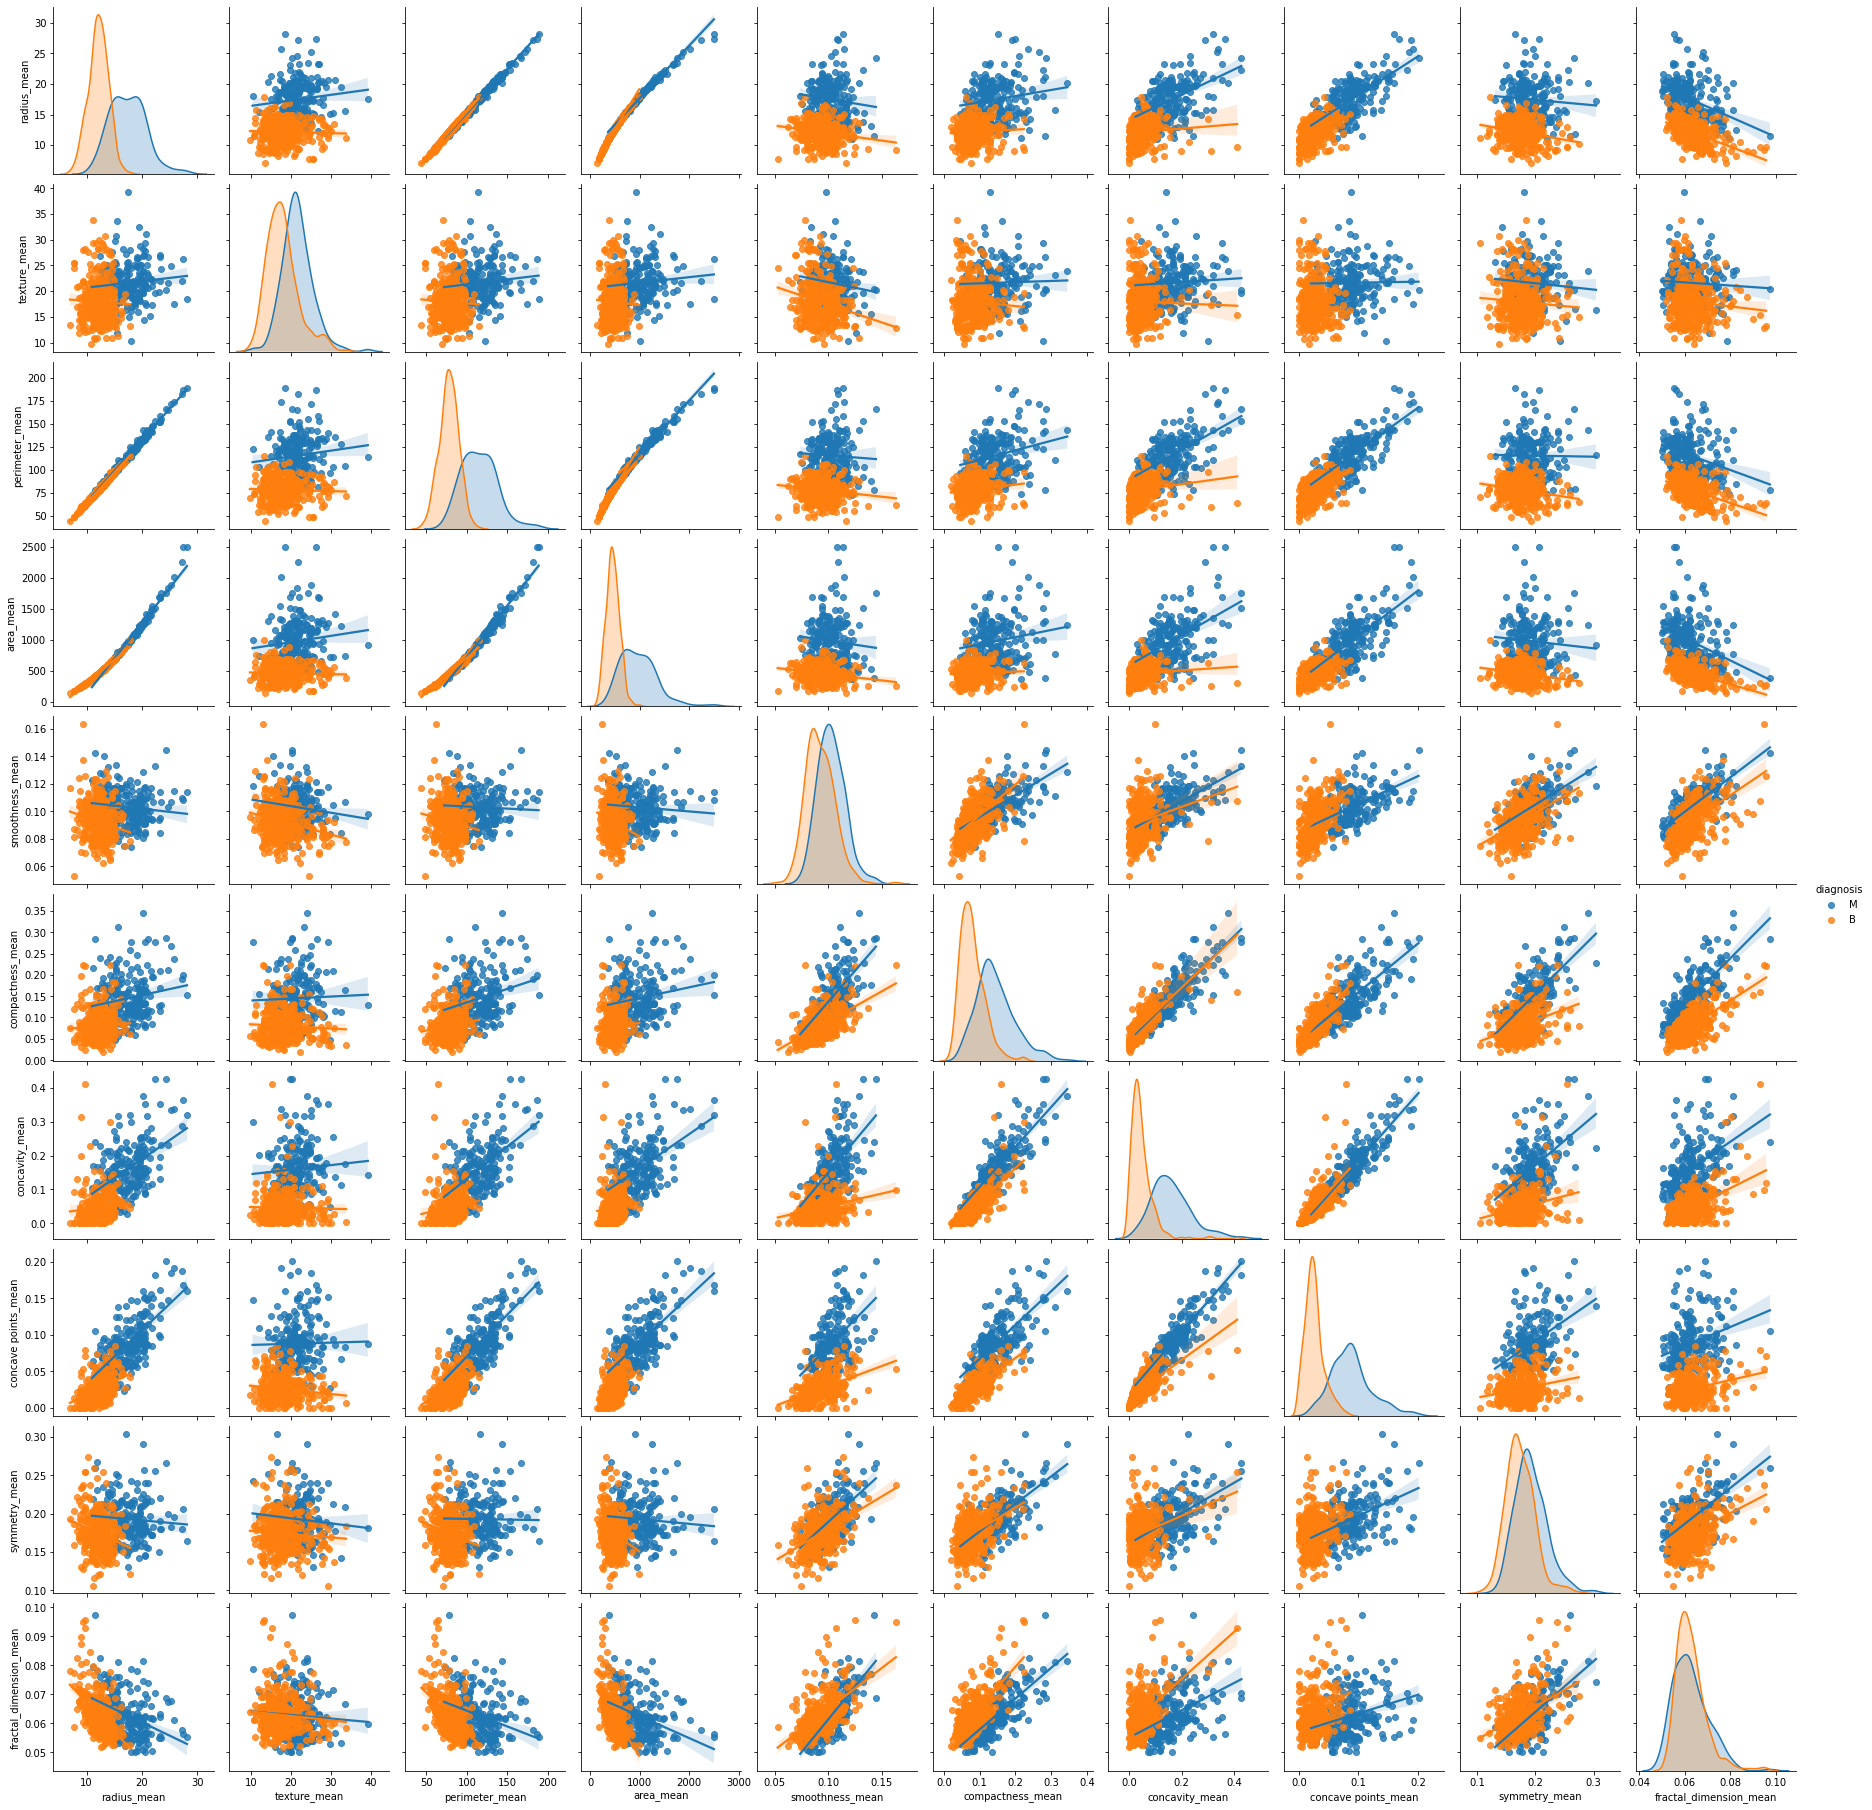

In [27]:
sns.pairplot(breast_diagnostic, hue='diagnosis', vars=[
                                                       'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
                                                       'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'
                                                       ], kind='reg')

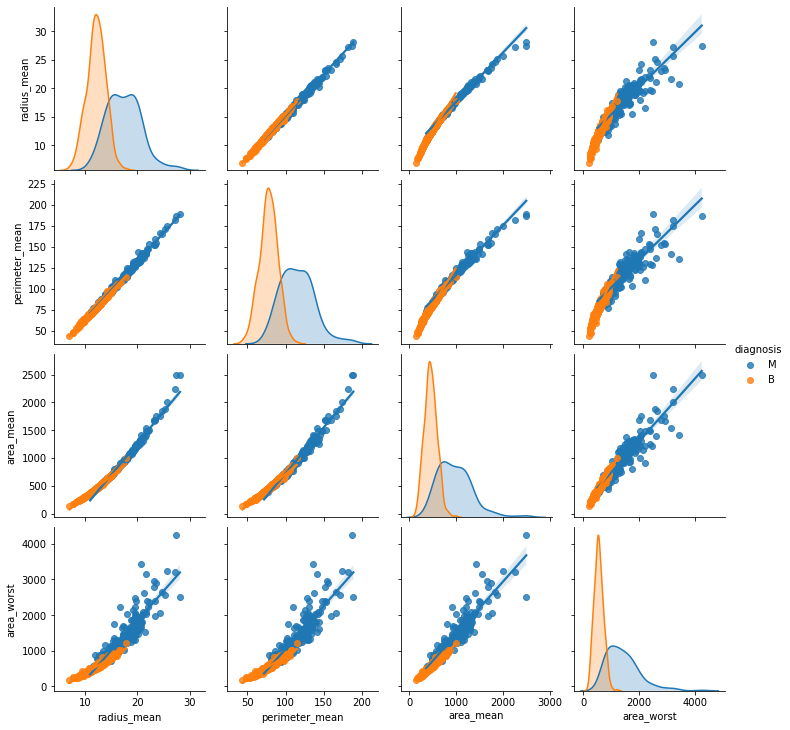

In [19]:
sns.pairplot(breast_diagnostic, hue='diagnosis', vars=['radius_mean', 'perimeter_mean', 'area_mean', 'area_worst'], kind='reg')

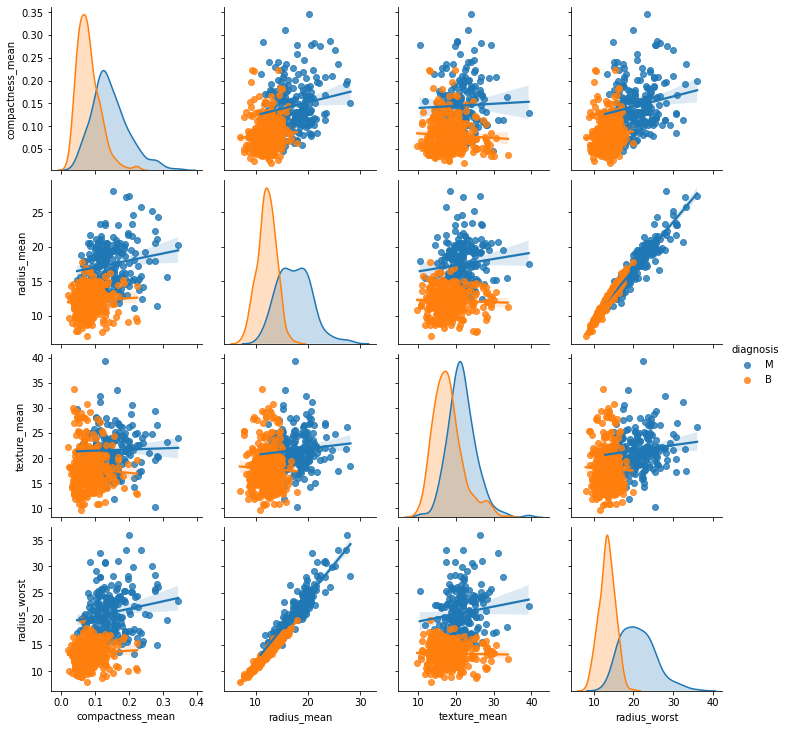

In [24]:
sns.pairplot(breast_diagnostic, hue='diagnosis', vars=['compactness_mean', 'radius_mean', 'texture_mean', 'radius_worst'], kind='reg')

## Machine Learning - Target Array: Diagnosis

1. Escolha uma classe de modelo importando do Scikit.
2. Escolha os hiperparâmetros do modelo instaciando a classe escolhida no Passo I.
3. Organize os dados em uma *feature matrix* e um *target array*.
4. Ajuste o modelo invocando o método **fit()**.
5. Aplique o modelo aos novos dados usando **predict()**.

###Por Decision Tree Classifier

####Passos 1 e 2

In [0]:
from sklearn.tree import DecisionTreeClassifier      # Passo 1: escolha do modelo
model_decisiontree = DecisionTreeClassifier()        # Passo 2: escolha dos hiperparâmetros e instanciação

####Passo 3

In [0]:
#Passo 3.1: Feature Matrix
X_diagnosis = breast_diagnostic.loc[:, [
                                      'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
                                      'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
                                      'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst',
                                      'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst',
                                      'symmetry_worst', 'fractal_dimension_worst'
                                     ]]
X_diagnosis.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
#Passo 3.2: Target Array
y_diagnosis = breast_diagnostic.diagnosis
y_diagnosis.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

#####Train Test Split

In [0]:
#Passo 3.3: Separação do Banco de Dados
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_diagnosis, y_diagnosis, random_state=2020, train_size=0.7)

######Banco de Dados - Treino

In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 293 to 392
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              398 non-null    float64
 1   texture_mean             398 non-null    float64
 2   perimeter_mean           398 non-null    float64
 3   area_mean                398 non-null    float64
 4   smoothness_mean          398 non-null    float64
 5   compactness_mean         398 non-null    float64
 6   concavity_mean           398 non-null    float64
 7   concave points_mean      398 non-null    float64
 8   symmetry_mean            398 non-null    float64
 9   fractal_dimension_mean   398 non-null    float64
 10  radius_se                398 non-null    float64
 11  texture_se               398 non-null    float64
 12  perimeter_se             398 non-null    float64
 13  area_se                  398 non-null    float64
 14  smoothness_se           

In [0]:
y_train.describe()

count     398
unique      2
top         B
freq      257
Name: diagnosis, dtype: object

######Banco de Dados - Teste

In [0]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 236 to 219
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              171 non-null    float64
 1   texture_mean             171 non-null    float64
 2   perimeter_mean           171 non-null    float64
 3   area_mean                171 non-null    float64
 4   smoothness_mean          171 non-null    float64
 5   compactness_mean         171 non-null    float64
 6   concavity_mean           171 non-null    float64
 7   concave points_mean      171 non-null    float64
 8   symmetry_mean            171 non-null    float64
 9   fractal_dimension_mean   171 non-null    float64
 10  radius_se                171 non-null    float64
 11  texture_se               171 non-null    float64
 12  perimeter_se             171 non-null    float64
 13  area_se                  171 non-null    float64
 14  smoothness_se           

In [0]:
y_test.describe()

count     171
unique      2
top         B
freq      100
Name: diagnosis, dtype: object

####Passo 4 e 5

In [0]:
#Passo 4: Ajuste o modelo aos dados
model_decisiontree.fit(X_train, y_train)
#Passo 5: Faça predições em dados novos
y_model_decisiontree = model_decisiontree.predict(X_test)

####Extra: Verificando a acurácia do modelo

In [0]:
#Verificando a acurácia do modelo escolhido
from sklearn.metrics import accuracy_score
accuracy_decisiontree = accuracy_score(y_test, y_model_decisiontree)
accuracy_decisiontree

0.9473684210526315

###Por Naive Bayes: GaussianNB

####Passo 1 e 2

In [0]:
from sklearn.naive_bayes import GaussianNB     # Passo 1: escolha do modelo
model_naiveb = GaussianNB()                    # Passo 2: escolha dos hiperparâmetros e instanciação

####Passo 4 e 5

In [0]:
#Passo 4: Ajuste o modelo aos dados
model_naiveb.fit(X_train, y_train)
#Passo 5: Faça predições em dados novos
y_model_naiveb = model_naiveb.predict(X_test)

GaussianNB(priors=None, var_smoothing=1e-09)

####Extra: Verificando a acurácia do modelo

In [0]:
#Verificando a acurácia do modelo escolhido
from sklearn.metrics import accuracy_score
accuracy_naiveb = accuracy_score(y_test, y_model_naiveb)
accuracy_naiveb

0.9590643274853801

###Por Random Forest: RandomForestClassifier


####Passo 1 e 2

In [0]:
from sklearn.ensemble import RandomForestClassifier     # Passo 1: escolha do modelo
model_randomforest = RandomForestClassifier()           # Passo 2: escolha dos hiperparâmetros e instanciação

####Passo 4 e 5

In [0]:
#Passo 4: Ajuste o modelo aos dados
model_randomforest.fit(X_train, y_train)
#Passo 5: Faça predições em dados novos
y_model_randomforest = model_randomforest.predict(X_test)

####Extra: Verificando a acurácia do modelo

In [0]:
#Verificando a acurácia do modelo escolhido
from sklearn.metrics import accuracy_score
accuracy_randomforest = accuracy_score(y_test, y_model_randomforest)
accuracy_randomforest

0.9590643274853801

###Cross Validation

####Passo 1 e 2

In [0]:
from sklearn.neighbors import KNeighborsClassifier     # Passo 1: escolha do modelo
model_knc = KNeighborsClassifier()                     # Passo 2: escolha dos hiperparâmetros e instanciação

####Extra: Verificando a acurácia do modelo

In [0]:
#Verificando a acurácia do modelo escolhido
from sklearn.model_selection import cross_val_score
cross_val_score(model_knc, X_diagnosis, y_diagnosis, cv=5)

array([0.88596491, 0.93859649, 0.93859649, 0.94736842, 0.92920354])

###Análise dos Resultados (Matriz de Confusão)

####Decision Tree

Text(83.40000000000006, 0.5, 'Valores Reais')

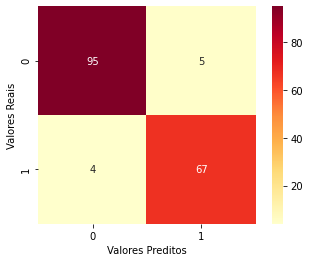

In [0]:
from sklearn.metrics import confusion_matrix
mat_decisiontree = confusion_matrix(y_test, y_model_decisiontree)

sns.heatmap(mat_decisiontree, square=True, annot=True, cmap='YlOrRd')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

Text(83.40000000000006, 0.5, 'Valores Reais')

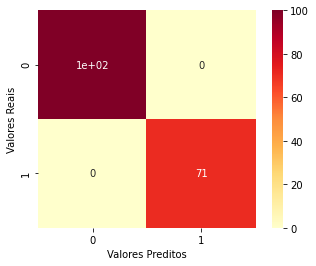

In [0]:
mat_real = pd.DataFrame (
    {
        '0': [y_test[y_test == 'B'].count(), 0],
        '1': [0, y_test[y_test == 'M'].count()]
    }
)
sns.heatmap(mat_real, square=True, annot=True, cmap='YlOrRd')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

####Naive Bayes

Text(83.40000000000006, 0.5, 'Valores Reais')

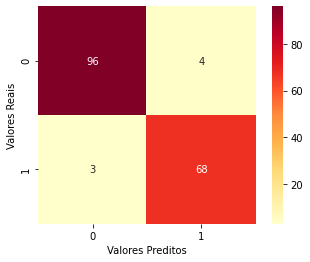

In [0]:
from sklearn.metrics import confusion_matrix
mat_naiveb = confusion_matrix(y_test, y_model_naiveb)

sns.heatmap(mat_naiveb, square=True, annot=True, cmap='YlOrRd')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

####Random Forest

Text(83.40000000000006, 0.5, 'Valores Reais')

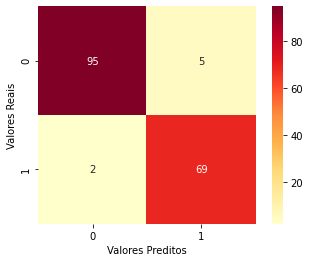

In [0]:
from sklearn.metrics import confusion_matrix
mat_randomforest = confusion_matrix(y_test, y_model_randomforest)

sns.heatmap(mat_randomforest, square=True, annot=True, cmap='YlOrRd')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')